In [1]:
# !pip install matplotlib
# !pip install seaborn
import pandas as pd
import pickle as pickle

In [2]:
dataset_dir = "/opt/ml/dataset/train/train.csv"
pd_dataset = pd.read_csv(dataset_dir)

In [3]:
# with open('./dict_label_to_num.pkl', 'rb') as f:
#     dict_label_to_num = pickle.load(f)
# with open('./dict_num_to_label.pkl', 'rb') as f:
#     dict_num_to_label = pickle.load(f)
    
# def label_to_num(label):
#   num_label = []
#   with open('./dict_label_to_num.pkl', 'rb') as f:
#     dict_label_to_num = pickle.load(f)
#   for v in label:
#     num_label.append(dict_label_to_num[v])
  
#   return num_label

# label = label_to_num(pd_dataset['label'].values)

with open('./dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)

In [4]:
from collections import defaultdict

label_dict = defaultdict(list)
for idx, data in pd_dataset.iterrows():
    sub_obj = sorted([ eval(data['subject_entity'])['type'], eval(data['object_entity'])['type'] ])
    sub_obj.append(data['id'])
    label_dict[data['label']].append(sub_obj)

In [5]:
# print(len(label_dict['org:number_of_employees/members']))
print(len(label_dict))

30


<ipython-input-6-185a711e0fa5>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[dict_label_to_num[key]].set_xticklabels(ct.keys(),fontsize=fs, fontweight='semibold',rotation=rt)
<ipython-input-6-185a711e0fa5>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[dict_label_to_num[key]].set_xticklabels(ct.keys(),fontsize=fs, fontweight='semibold',rotation=rt)
<ipython-input-6-185a711e0fa5>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[dict_label_to_num[key]].set_xticklabels(ct.keys(),fontsize=fs, fontweight='semibold',rotation=rt)
<ipython-input-6-185a711e0fa5>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[dict_label_to_num[key]].set_xticklabels(ct.keys(),fontsize=fs, fontweight='semibold',rotation=rt)
<ipython-input-6-185a711e0fa5>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[dict_label_to_num[key]]

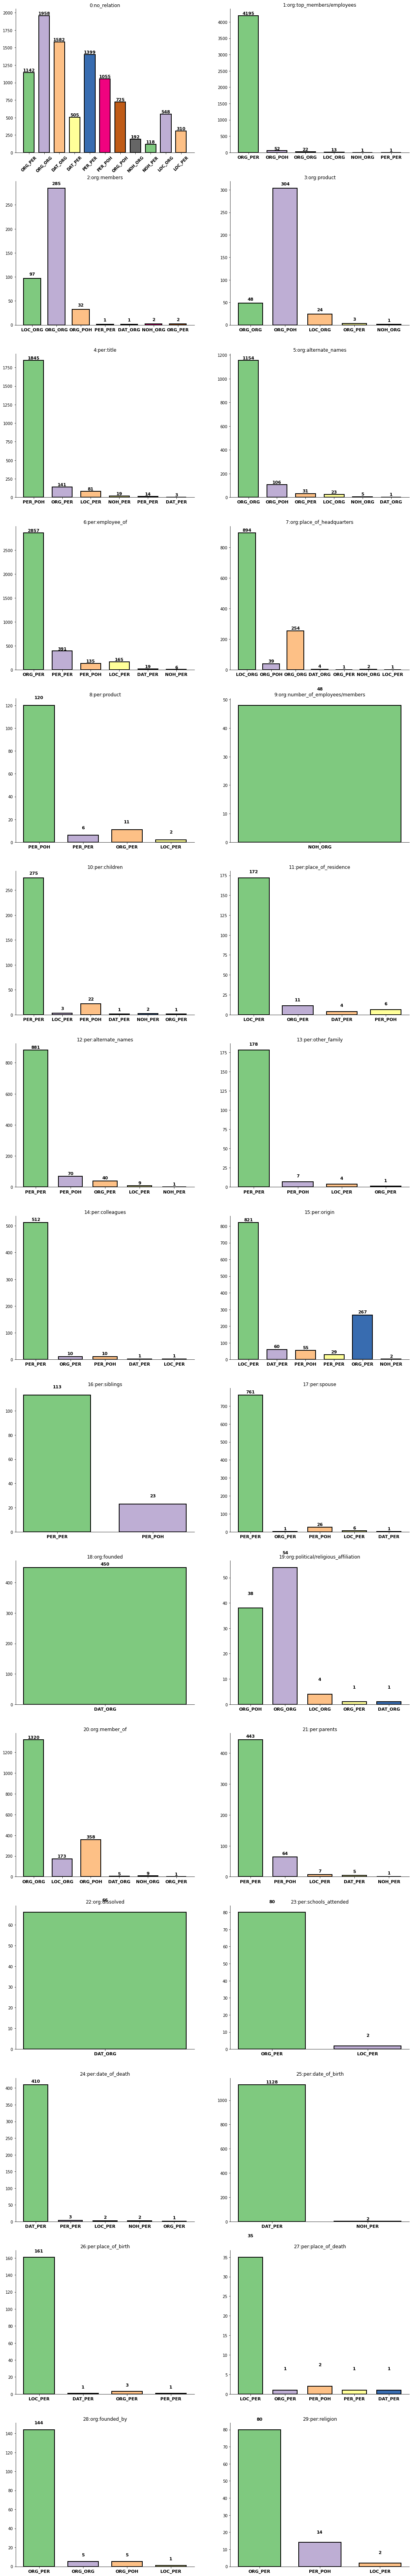

In [6]:
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("Accent")

fig, axes = plt.subplots(15, 2, figsize=(18, 120))
axes = axes.flatten()

for key, values in label_dict.items():
    ct = Counter()
    for ent1, ent2, id_ in values:
        ct.update(['_'.join([ent1,ent2])])
    # print(label_to_num(key))
    # print(ct)
    fs = 11
    rt = 0
    if dict_label_to_num[key] == 0:
        fs = 10
        rt = 45
        
    axes[dict_label_to_num[key]].bar(ct.keys(), ct.values(), edgecolor='black', width=0.7, linewidth=2, color=palette)
    axes[dict_label_to_num[key]].set_title(str(dict_label_to_num[key])+':'+key,fontsize=12)
    axes[dict_label_to_num[key]].set_xticklabels(ct.keys(),fontsize=fs, fontweight='semibold',rotation=rt)
    axes[dict_label_to_num[key]].spines['top'].set_visible(False)
    axes[dict_label_to_num[key]].spines['right'].set_visible(False)
    for i, value in zip(ct.keys(), ct.values()):
        axes[dict_label_to_num[key]].text(i,value+5, s=value,
                                             ha='center', 
                                             fontweight='semibold',
                                             fontsize=11,
                                             va='bottom'
                                            )

In [7]:
# subject_entity object_entity subject_type object_type 컬럼추가
pd_dataset["subject_word"]=''
pd_dataset["subject_type"]=''
pd_dataset["object_word"]=''
pd_dataset["object_type"]=''

for index, row in pd_dataset.iterrows():
    pd_dataset.at[index,"subject_word"] = eval(row["subject_entity"])['word']
    pd_dataset.at[index,"subject_type"] = eval(row["subject_entity"])['type']
    pd_dataset.at[index,"object_word"] = eval(row["object_entity"])['word']
    pd_dataset.at[index,"object_type"] = eval(row["object_entity"])['type']

save_dataset = pd_dataset.drop(['subject_entity','object_entity','source'], axis=1)

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', None)
save_dataset.head()

,id,sentence,label,subject_word,subject_type,object_word,object_type
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.,no_relation,비틀즈,ORG,조지 해리슨,PER
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으로 재탄생한다.,no_relation,민주평화당,ORG,대안신당,ORG
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터 관중 유치 성과와 마케팅 성과를 인정받아 ‘풀 스타디움상’과 ‘플러스 스타디움상’을 수상했다.,org:member_of,광주FC,ORG,한국프로축구연맹,ORG
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪고 있는 대구광역시에 행복박스를 전달했다고 10일 밝혔다.,org:top_members/employees,아성다이소,ORG,박정부,PER
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8번으로 배정되었다.,no_relation,요미우리 자이언츠,ORG,1967,DAT


In [8]:
print('label 10 ',"per:children",len(save_dataset.query('label == "per:children" and not (subject_type == "PER" and object_type == "PER")')),'개')

save_dataset.query('label == "per:children" or label =="per:alternate_names" or label =="org:founded"\
                   or label =="org:member_of" or label =="per:religion"').to_csv('./handsort.csv', sep=',', mode= 'w', encoding='utf-8' , na_rep='NaN')

save_dataset.query('label == "per:children" and not (subject_type == "PER" and object_type == "PER")')

# for i,row in pd_dataset.query('label == "per:children" and not (subject_type == "PER" and object_type == "PER")').iterrows():
#     print('-'*140)
#     print('*id:[',i,']')
#     print(row['sentence'])
#     sub = eval(row['subject_entity'])
#     obj = eval(row['object_entity'])
#     print('*sub:[',sub['word'],'/',sub['type'],'] // *obj:[',obj['word'],'/',obj['type'],'] // *label:[',row['label'],']')

# pd_dataset.query('label == "per:children"')

label 10  per:children 29 개


,id,sentence,label,subject_word,subject_type,object_word,object_type
843,843,"양평군의 어머니 숙의 이씨는 양성 이씨 출신으로, 중종 때 판의금부사와 좌찬성 등을 역임한 이손과 일가 친척이다.",per:children,숙의 이씨,PER,양평군,LOC
1985,1985,13일 오후 10시 방송되는 SBS플러스 ‘김수미의 밥은 먹고 다니냐’에 배우 이미영 씨가 출연하는데 방송 말미에 딸 전보람 씨가 엄마를 찾아와 애틋한 사연을 털어놓았다고 한다.,per:children,이미영,PER,딸 전보람,POH
1992,1992,로이히텐베르크의 요세피나는 조제핀이라는 이름으로 외젠 드 보아르네와 바이에른 공주 아우구스테의 장녀로 태어났다.,per:children,외젠 드 보아르네,PER,로이히텐베르크의 요세피나,LOC
5117,5117,배우 서효림 씨가 김수미 씨의 아들 정명호 대표와 오는 12월 결혼한다.,per:children,김수미,PER,정명호,POH
7281,7281,"김인문(金仁問, 629년~694년)은 신라의 왕족이자 문무왕 때의 장군 및 정치가이고, 태종무열왕의 둘째 아들이며 문무왕의 친동생이다.",per:children,태종무열왕,PER,문무왕,DAT
13130,13130,"양평군은 문종의 딸 경혜공주의 유일한 아들인 정미수의 집과, 어머니 숙의 이씨의 일가 친척인 이손의 집에서 성장하였다.",per:children,숙의 이씨,PER,양평군,LOC
13471,13471,김구라가 아들 그리의 지원에 대해 구체적으로 밝혔다.,per:children,김구라,PER,아들 그리,POH
13706,13706,김수미의 아들 정명호 대표는 서효림보다 9살 연상이다.,per:children,김수미,PER,아들 정명호,POH
14080,14080,가수 윤민수 씨의 아들 윤후 군의 근황이 전달돼 화제다.,per:children,윤민수,PER,아들 윤후,POH
14805,14805,모델 변정수 씨가 24살에 낳은 딸 유채원 씨가 모델의 길을 걷는다.,per:children,변정수,PER,딸 유채원,POH


In [ ]:
pd_dataset.query('label == "per:children" and not (subject_type == "PER" and object_type == "PER")')